In [5]:
import numpy as np
from matplotlib import pyplot as plt
from collections import deque

In [3]:
# From file with edges, generate adjacency matrix
class Graph:
    def __init__(self, edges_file):
        f = open(edges_file, "r")
        # first line is number of nodes
        line = f.readline()
        self.num_nodes = int(line)
        line = f.readline()
        
        self.adj_matrix = [[0 for col in range(self.num_nodes)] for row in range(self.num_nodes)]
        self.adj_list = [[] for _ in range(self.num_nodes)]
        self.num_edges = 0
        
        # next lines are pairs of edges
        while line:
            u, v = list(map(int, line.split()))
            self.adj_matrix[u][v] = 1
            self.adj_matrix[v][u] = 1
            self.adj_list[u].append(v)
            self.adj_list[v].append(u)
            self.num_edges += 1
            line = f.readline()
        f.close()
        
    def betweenness_centrality(self):
        # taken from http://snap.stanford.edu/class/cs224w-readings/brandes01centrality.pdf
        c_b = [0 for i in range(self.num_nodes)]

        for s in range(self.num_nodes):
            stack = []

            P = [[] for w in range(self.num_nodes)]

            sigma = [0 for t in range(self.num_nodes)]
            sigma[s] = 1

            d = [-1 for t in range(self.num_nodes)]
            d[s] = 0

            queue = deque()
            queue.append(s)

            while queue:
                v = queue.popleft()
                stack.append(v)

                for w in self.adj_list[v]:
                    # neighbor w found for the first time?
                    if d[w] < 0:
                        queue.append(w)
                        d[w] = d[v] + 1

                    # shortest path to w via v?
                    if d[w] == d[v] + 1:
                        sigma[w] += sigma[v]
                        P[w].append(v)
                            
            delta = [0 for v in range(self.num_nodes)]
            # stack returns vertices in order of non-increasing distance from s
            while stack:
                w = stack.pop()
                for v in P[w]:
                    delta[v] += (sigma[v]/sigma[w])*(1 + delta[w])
                if w != s:
                    c_b[w] += delta[w]
        
        # shortest paths counted twice, so divide by 2
        return np.array(c_b) // 2
                    
    def eigenvector_centrality(self):
        eigenvals, eigenvecs = np.linalg.eig(self.adj_matrix)
        # use leading eigenvector as centrality
        centrality = eigenvecs[0]
        return centrality  
    
    def clustering_coefficient(self):
        cluster_coefs = []

        for node in range(self.num_nodes):
            node_neighbors = self.adj_list[node]
            node_degree = len(node_neighbors)

            # Set coef of isolated nodes as 0
            if node_degree in [0,1]:
                cluster_coefs.append(0)
                continue

            denom = node_degree * (node_degree - 1) // 2
            numerator = 0
            for u in node_neighbors:
                for v in node_neighbors:
                    if self.adj_matrix[u][v] and u != v:
                        numerator += 1
            cluster_coefs.append(numerator / denom)
            
        cluster_coefs = list(map(lambda x: x / 2, cluster_coefs))
        return cluster_coefs
        
graph = Graph("amazon.txt")
print("Nodes: " + str(graph.num_nodes))
print("Edges: " + str(graph.num_edges))

Nodes: 7650
Edges: 238162


In [6]:
betweenness_centrality = graph.betweenness_centrality()

In [7]:
# Show the n nodes with largest betweenness centrality
n = 10
print("Nodes with largest betweenness centrality:")
idx = np.argpartition(betweenness_centrality, -n)[-n:]
indices = idx[np.argsort((-betweenness_centrality)[idx])]
for index in indices:
    print(f"Node {index:4d}\t {betweenness_centrality[index]}")

Nodes with largest betweenness centrality:
Node 2198	 3060936.0
Node 2239	 2012742.0
Node 4805	 1341057.0
Node 2250	 1069357.0
Node 7620	 1048657.0
Node 1280	 1031289.0
Node 4376	 937783.0
Node 4384	 835892.0
Node 6138	 724556.0
Node  593	 714990.0


In [8]:
eigenvector_centrality = graph.eigenvector_centrality()

In [9]:
# Show the n nodes with largest eigenvector centrality
n = 10
print("Nodes with largest eigenvector centrality:")
idx = np.argpartition(eigenvector_centrality, -n)[-n:]
indices = idx[np.argsort((-eigenvector_centrality)[idx])]
for index in indices:
    print(f"Node {index}\t {float(eigenvector_centrality[index])}")

Nodes with largest eigenvector centrality:
Node 7323	 0.0772003164573695
Node 6973	 0.06954984166432013
Node 6701	 0.06846838616801176
Node 6977	 0.06682405165476378
Node 6765	 0.06481511968929522
Node 7190	 0.06188095254334526
Node 6951	 0.06096548538362114
Node 6860	 0.05786903041397246
Node 7397	 0.05507418460328163
Node 7173	 0.053431184624701755


/tmp/ipykernel_23309/1263152907.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  print(f"Node {index}\t {float(eigenvector_centrality[index])}")


In [10]:
# Calculate clustering coefficient by brute force
cluster_coefs = graph.clustering_coefficient()

In [16]:
dataset_name = "Amazon Photos"
file_name = "amazonphotos"

f = open(f"{file_name}_betweenness_centrality.txt", "w")

for node in range(graph.num_nodes):
    f.write(f"{node}\t{betweenness_centrality[node]}\n")
f.close()
print("Done saving betweenness centrality")

f = open(f"{file_name}_eigenvector_centrality.txt", "w")

for node in range(graph.num_nodes):
    f.write(f"{node}\t{float(eigenvector_centrality[node])}\n")
f.close()
print("Done saving eigenvector centrality")

f = open(f"{file_name}_clustering_coefficient.txt", "w")

for node in range(graph.num_nodes):
    f.write(f"{node}\t{cluster_coefs[node]}\n")
f.close()
print("Done saving clustering coefficient")

Done saving betweenness centrality
Done saving eigenvector centrality
Done saving clustering coefficient


/tmp/ipykernel_23309/2167631794.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  f.write(f"{node}\t{float(eigenvector_centrality[node])}\n")


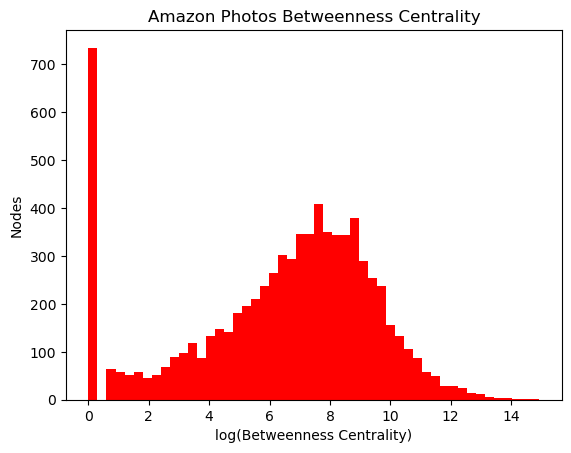

/gpfs/loomis/apps/services/ood/var_www_ood_apps/conda/ycrc_default/lib/python3.10/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/gpfs/loomis/apps/services/ood/var_www_ood_apps/conda/ycrc_default/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6708: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


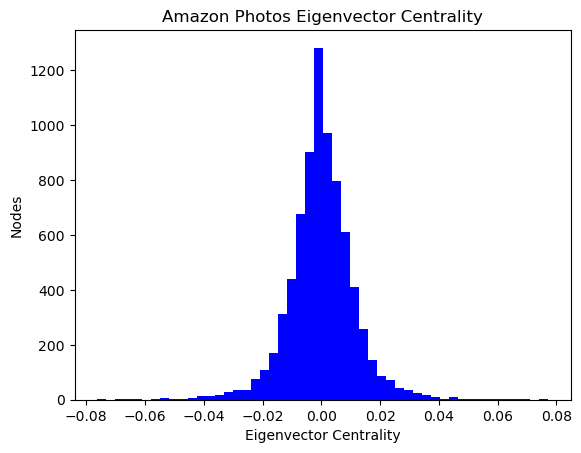

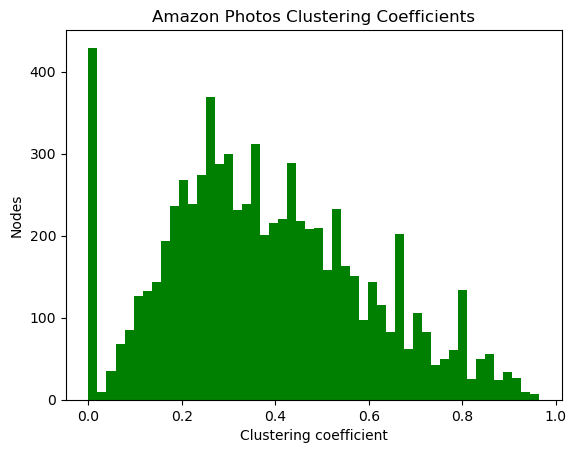

In [17]:
# Histogram for betweenness centrality
plt.hist(np.log(betweenness_centrality + 1), bins=50, color="red")
plt.title(dataset_name + " Betweenness Centrality")
plt.xlabel("log(Betweenness Centrality)")
plt.ylabel("Nodes")
plt.savefig(file_name + "_betweenness_centrality.pdf",format="pdf")
plt.show()

# Histogram for eigenvector centrality
plt.hist(eigenvector_centrality, color="blue", bins = 50)
plt.title(dataset_name + " Eigenvector Centrality")
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Nodes")
plt.savefig(file_name + "_eigenvector_centrality.pdf",format="pdf")
plt.show()

# Histogram for clustering coefficient
plt.hist(cluster_coefs, bins = 50, color="green")
plt.title(dataset_name + " Clustering Coefficients")
plt.xlabel("Clustering coefficient")
plt.ylabel("Nodes")
plt.savefig(file_name + "_clustering_coefficient.pdf",format="pdf")
plt.show()